<a href="https://colab.research.google.com/github/aka-hombre/MAT422/blob/main/MAT422_HW2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import random
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from IPython.display import display, Latex
from sympy import *
from collections import Counter
from scipy.stats import poisson,norm
from scipy.integrate import quad

#2.3.1 Joint Probability Distributions

A joint probability is the probability of two or more events happening. Two random variables $X,Y$ are said to be independent when, $\forall(x\in X \land y\in Y) \rightarrow p(x,y)=p_X(x)\cdot p_Y(x) \ \text{when X and Y  are discrete};\ f(x,y)=f_X(x)\cdot f_Y(y) \ \text{when X and Y are continuous}.$



In [2]:
# Loading the data
url = 'https://drive.google.com/uc?export=download&id=1fP5WwIdQEFngo_lwFhl2WKPABBILRvCQ'
data = pd.read_csv(url)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Figure size 1000x800 with 0 Axes>

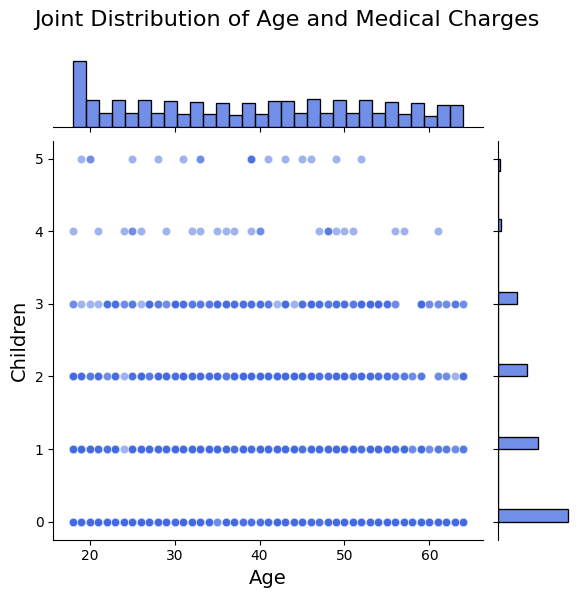

In [3]:
# Create a joint plot
plt.figure(figsize=(10, 8))
joint_plot = sns.jointplot(
    x='age',
    y='children',
    data=data,
    kind='scatter',
    color='royalblue',
    alpha=0.5,
    marginal_kws=dict(bins=30, fill=True)
)

plt.subplots_adjust(top=0.9)  # Adjust the top margin to make space for the title
joint_plot.fig.suptitle('Joint Distribution of Age and Medical Charges', fontsize=16)

# Customize the axes labels
joint_plot.ax_joint.set_xlabel('Age', fontsize=14)
joint_plot.ax_joint.set_ylabel('Children', fontsize=14)

# Customize the marginal histograms
joint_plot.ax_marg_x.set_ylabel('Frequency', fontsize=12)
joint_plot.ax_marg_y.set_xlabel('Frequency', fontsize=12)

plt.show()

Bellow we will show our data as a KDE plot, another joint distibution plot, to visualize our data.

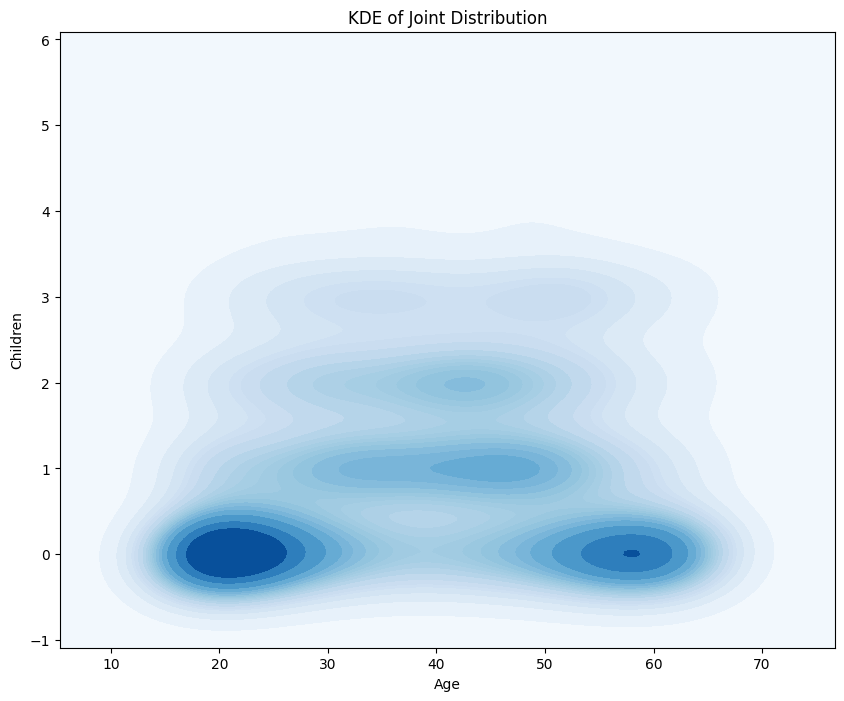

In [88]:
# Visualize the KDE
plt.figure(figsize=(10, 8))
sns.kdeplot(x='age', y='children', data=data, cmap="Blues", fill=True, thresh=0, levels=20)
plt.title("KDE of Joint Distribution")
plt.xlabel("Age")
plt.ylabel("Children")
plt.show()

The dark blue cirlce aruond 20 age and 0 children telss us there is a higher density of data, similar to the smaller dark blue circle between 50-60 age and 0 children. This means $P(\text{20 age}\cap\text{zerochildren})>P(\text{50-60 age}\cap\text{0 children})$

#2.3.2 Correlation and Dependence:

We will continue looking at insurance data, to determine the corelation and dependence of BMI and insurance charges.

Pearson correlation: 0.1983409688336288
P-value: 2.459085535116766e-13

Spearman correlation: 0.11939590358331145
P-value: 1.1926059544526874e-05


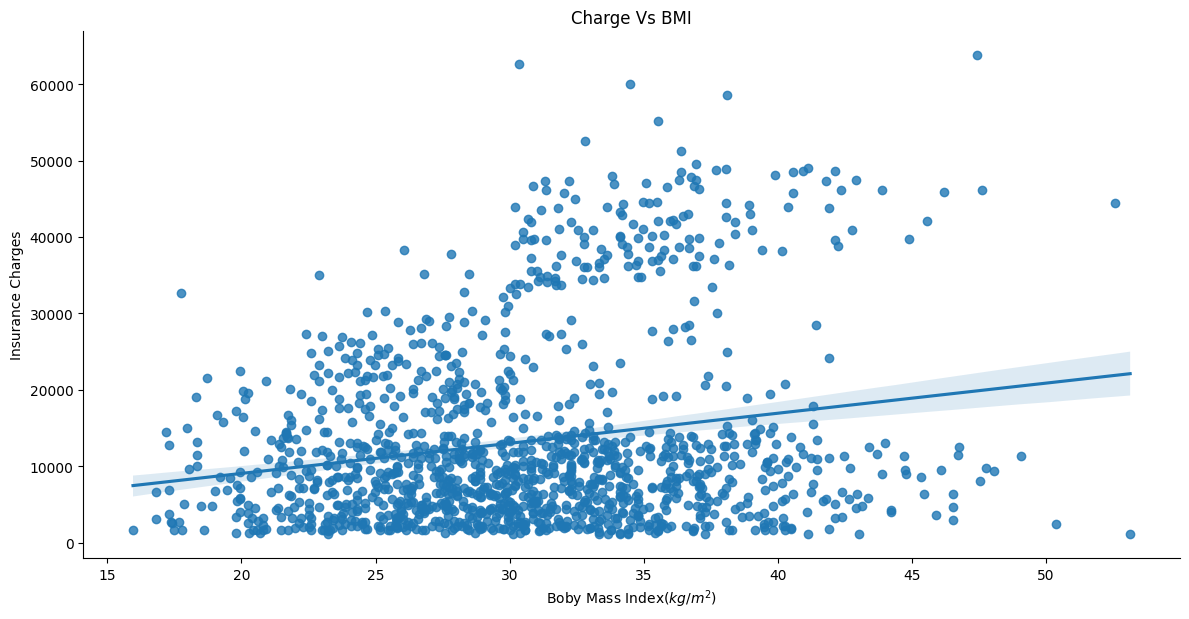

In [56]:
#Bmi and insurance cost
sns.lmplot(x='bmi',y='charges',data=data,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$')
plt.ylabel('Insurance Charges')
plt.title('Charge Vs BMI');

#Now let's evaluate to diffrent correlation coefficients
pearson_corr, p_value = stats.pearsonr(data['bmi'], data['charges']) #Pearson's correlation coefficient is the familiar r-value

print(f"Pearson correlation: {pearson_corr}")
print(f"P-value: {p_value}")

spearman_corr, p_value1 = stats.spearmanr(data['bmi'], data['charges'])

print(f"\nSpearman correlation: {spearman_corr}")
print(f"P-value: {p_value1}")

Notice the Pearson's correlation coefficient has a lower p-value! However, just because both correlation coefficience are not equal to zeroe doesn't mean bothe variables are independent. Lets make some independent data, and see if the corellation coefficient equals zero!

Pearson correlation: 0.004431811845430854
P-value: 0.8713380464021396

Spearman correlation: 0.00921797034552353
P-value: 0.7362124699433585


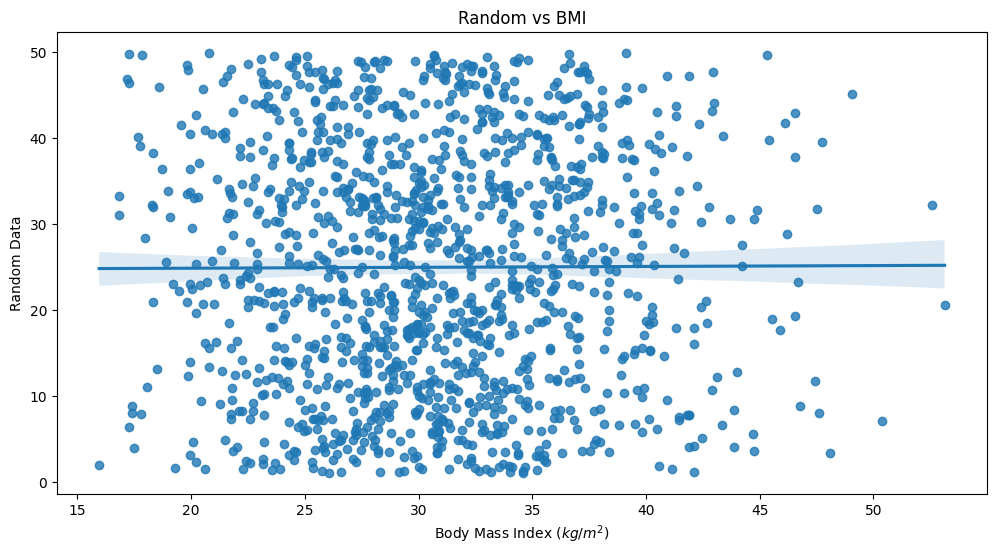

In [76]:
#Bmi and Random

randomstuff = np.random.uniform(low=1, high=50, size=np.size(data['bmi'])) #random data

plt.figure(figsize=(12, 6))
sns.regplot(x=data['bmi'], y=randomstuff)
plt.xlabel('Body Mass Index $(kg/m^2)$')
plt.ylabel('Random Data')
plt.title('Random vs BMI')

#Now let's evaluate to diffrent correlation coefficients
pearson_corr, p_value = stats.pearsonr(data['bmi'], randomstuff) #Pearson's correlation
                                                                    #coefficient is the familiar r-value
print(f"Pearson correlation: {pearson_corr}")
print(f"P-value: {p_value}")

spearman_corr, p_value1 = stats.spearmanr(data['bmi'], randomstuff)

print(f"\nSpearman correlation: {spearman_corr}")
print(f"P-value: {p_value1}")

Our corellation coefficeints should be zero, but they aren't! Also notice the high p-values, this outlines the strengths and weaknesses of corelation coefficients and their p-value.

#2.3.3 Random Samples

Let's do an example of the Central Limit Theorem, which shows how the distribution of sample means from random samples approaches a normal distribution, regardless of the population's distribution, as the sample size increases.

In [35]:
#let's pick a number between 0 and 10
print('Here is our number:')
print(10*random.random())

Here is our number:
5.520274340310256


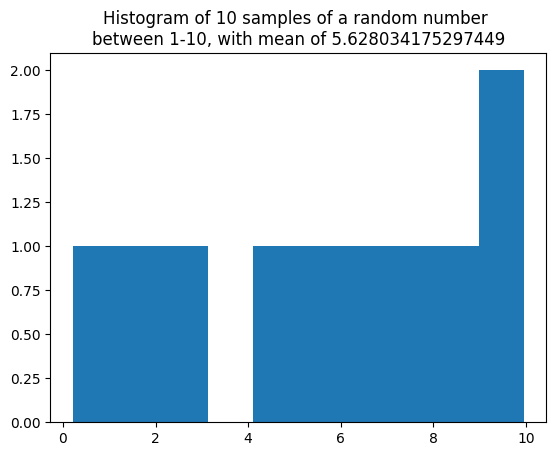

In [28]:
random_samples = [10*random.random() for _ in range(10)]
mean = np.mean(random_samples)
plt.hist(random_samples)
plt.title("Histogram of 10 samples of a random number \nbetween 1-10, with mean of "+str(mean))
plt.show()

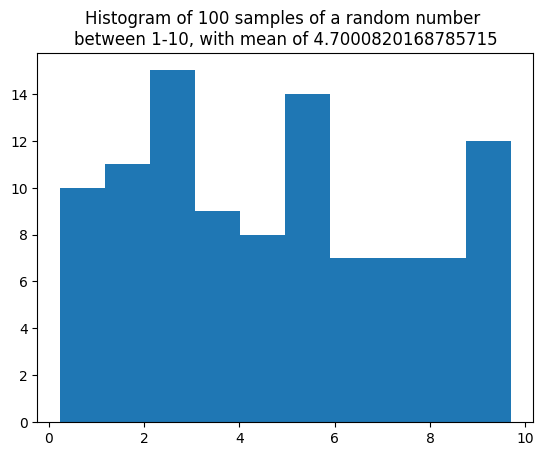

In [29]:
random_samples = [10*random.random() for _ in range(100)]
mean = np.mean(random_samples)
plt.hist(random_samples)
plt.title("Histogram of 100 samples of a random number \nbetween 1-10, with mean of "+str(mean))
plt.show()

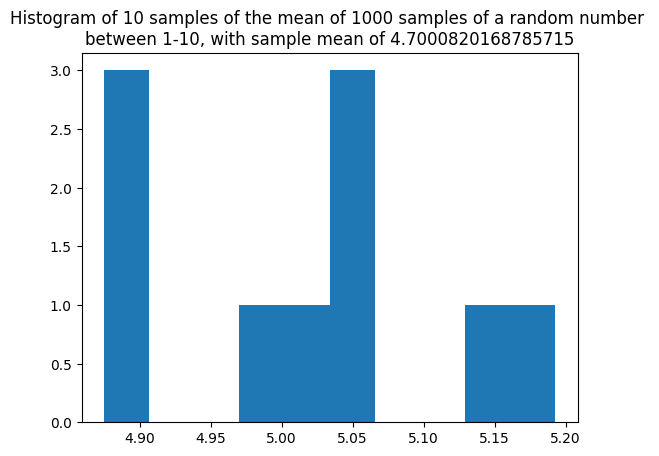

In [36]:
means = np.zeros(10)
for i in range(means.size):
  means[i] = np.mean([10*random.random() for _ in range(1000)])
plt.hist(means, bins=10)
plt.title("Histogram of 10 samples of the mean of 1000 samples of a random number \nbetween 1-10, with sample mean of "+str(mean))
plt.show()

Notice how spread apart our means are, and pay attention to how their spread changes as we increase the number of samples by a factor of 10.

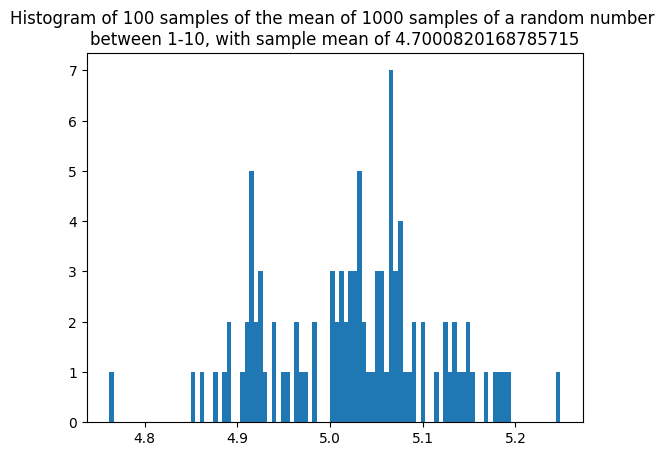

In [32]:
means = np.zeros(100)
for i in range(means.size):
  means[i] = np.mean([10*random.random() for _ in range(1000)])
plt.hist(means, bins=100)
plt.title("Histogram of 100 samples of the mean of 1000 samples of a random number \nbetween 1-10, with sample mean of "+str(mean))
plt.show()

Here we are begining to look at something more "bell-like", but our sample mean distribution, still doesn't look normal!

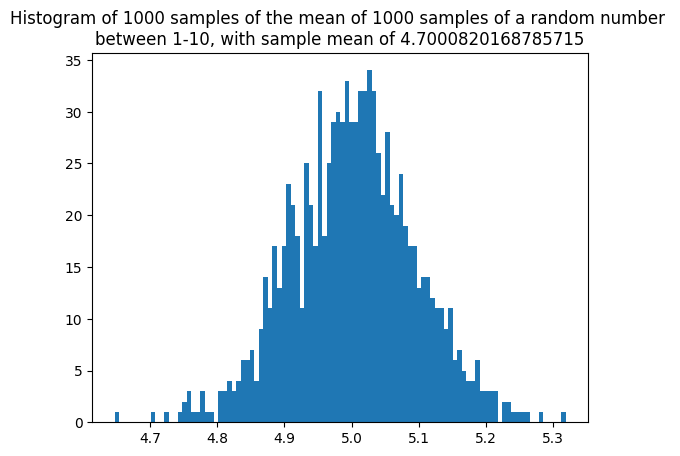

In [33]:
means = np.zeros(1000)
for i in range(means.size):
  means[i] = np.mean([10*random.random() for _ in range(1000)])
plt.hist(means, bins=100)
plt.title("Histogram of 1000 samples of the mean of 1000 samples of a random number \nbetween 1-10, with sample mean of "+str(mean))
plt.show()

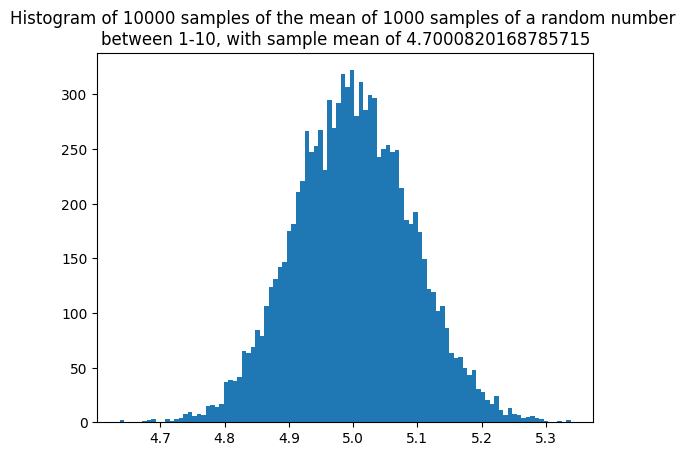

In [44]:
means = np.zeros(10000)
for i in range(means.size):
  means[i] = np.mean([10*random.random() for _ in range(1000)])
plt.hist(means, bins=100)
plt.title("Histogram of 10000 samples of the mean of 1000 samples of a random number \nbetween 1-10, with sample mean of "+str(mean))
plt.show()

Voila! We have a distribution that looks approximately normal.